In [834]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

full_dataset_confounders_2011 = pd.read_csv('processed_data/full_dataset_confounders_2011.csv')
full_dataset_confounders_2012 = pd.read_csv('processed_data/full_dataset_confounders_2012.csv')
full_dataset_confounders_2013 = pd.read_csv('processed_data/full_dataset_confounders_2013.csv')

full_dataset_confounders_2011['Aged 16-64 Percentage'] = full_dataset_confounders_2011["('Population and Age; Aged 16-64; 2011', '2011')"] / (full_dataset_confounders_2011["('Population and Age; Aged 16-64; 2011', '2011')"] + full_dataset_confounders_2011["('Population and Age; Aged 0-15; 2011', '2011')"] + full_dataset_confounders_2011["('Population and Age; Aged 65+; 2011', '2011')"])
full_dataset_confounders_2011['Aged 0-15 Percentage'] = full_dataset_confounders_2011["('Population and Age; Aged 0-15; 2011', '2011')"] / (full_dataset_confounders_2011["('Population and Age; Aged 16-64; 2011', '2011')"] + full_dataset_confounders_2011["('Population and Age; Aged 0-15; 2011', '2011')"] + full_dataset_confounders_2011["('Population and Age; Aged 65+; 2011', '2011')"])
full_dataset_confounders_2011['Aged 65+ Percentage'] = full_dataset_confounders_2011["('Population and Age; Aged 65+; 2011', '2011')"] / (full_dataset_confounders_2011["('Population and Age; Aged 16-64; 2011', '2011')"] + full_dataset_confounders_2011["('Population and Age; Aged 0-15; 2011', '2011')"] + full_dataset_confounders_2011["('Population and Age; Aged 65+; 2011', '2011')"])
full_dataset_confounders_2012['Aged 16-64 Percentage'] = full_dataset_confounders_2012["('Population and Age; Aged 16-64; 2012', '2012')"] / (full_dataset_confounders_2012["('Population and Age; Aged 16-64; 2012', '2012')"] + full_dataset_confounders_2012["('Population and Age; Aged 0-15; 2012', '2012')"] + full_dataset_confounders_2012["('Population and Age; Aged 65+; 2012', '2012')"])
full_dataset_confounders_2012['Aged 0-15 Percentage'] = full_dataset_confounders_2012["('Population and Age; Aged 0-15; 2012', '2012')"] / (full_dataset_confounders_2012["('Population and Age; Aged 16-64; 2012', '2012')"] + full_dataset_confounders_2012["('Population and Age; Aged 0-15; 2012', '2012')"] + full_dataset_confounders_2012["('Population and Age; Aged 65+; 2012', '2012')"])
full_dataset_confounders_2012['Aged 65+ Percentage'] = full_dataset_confounders_2012["('Population and Age; Aged 65+; 2012', '2012')"] / (full_dataset_confounders_2012["('Population and Age; Aged 16-64; 2012', '2012')"] + full_dataset_confounders_2012["('Population and Age; Aged 0-15; 2012', '2012')"] + full_dataset_confounders_2012["('Population and Age; Aged 65+; 2012', '2012')"])
full_dataset_confounders_2013['Aged 16-64 Percentage'] = full_dataset_confounders_2013["('Population and Age; Aged 16-64; 2013', '2013')"] / (full_dataset_confounders_2013["('Population and Age; Aged 16-64; 2013', '2013')"] + full_dataset_confounders_2013["('Population and Age; Aged 0-15; 2013', '2013')"] + full_dataset_confounders_2013["('Population and Age; Aged 65+; 2013', '2013')"])
full_dataset_confounders_2013['Aged 0-15 Percentage'] = full_dataset_confounders_2013["('Population and Age; Aged 0-15; 2013', '2013')"] / (full_dataset_confounders_2013["('Population and Age; Aged 16-64; 2013', '2013')"] + full_dataset_confounders_2013["('Population and Age; Aged 0-15; 2013', '2013')"] + full_dataset_confounders_2013["('Population and Age; Aged 65+; 2013', '2013')"])
full_dataset_confounders_2013['Aged 65+ Percentage'] = full_dataset_confounders_2013["('Population and Age; Aged 65+; 2013', '2013')"] / (full_dataset_confounders_2013["('Population and Age; Aged 16-64; 2013', '2013')"] + full_dataset_confounders_2013["('Population and Age; Aged 0-15; 2013', '2013')"] + full_dataset_confounders_2013["('Population and Age; Aged 65+; 2013', '2013')"])

full_dataset_confounders_2011.drop(["('Population and Age; Aged 16-64; 2011', '2011')", "('Population and Age; Aged 0-15; 2011', '2011')", "('Population and Age; Aged 65+; 2011', '2011')"], axis=1, inplace=True)
full_dataset_confounders_2012.drop(["('Population and Age; Aged 16-64; 2012', '2012')", "('Population and Age; Aged 0-15; 2012', '2012')", "('Population and Age; Aged 65+; 2012', '2012')"], axis=1, inplace=True)
full_dataset_confounders_2013.drop(["('Population and Age; Aged 16-64; 2013', '2013')", "('Population and Age; Aged 0-15; 2013', '2013')", "('Population and Age; Aged 65+; 2013', '2013')"], axis=1, inplace=True)

full_dataset_confounders_2011.fillna(0, inplace=True)
full_dataset_confounders_2012.fillna(0, inplace=True)
full_dataset_confounders_2013.fillna(0, inplace=True)

In [835]:
def get_truncnorm_generated(dataset, size):
    (a, b, loc, scale) = stats.truncnorm.fit(dataset)
    return stats.truncnorm.rvs(a, b, loc, scale, size=size)

def get_exponential_generated(dataset, size):
    (loc, scale)= stats.expon.fit(dataset)
    return stats.expon.rvs(loc, scale, size=size)

def get_exponential_treatment_generated(row, a = 275):
    scale = row.sum() / a
    return stats.expon.rvs(loc = 0, scale=scale, size=1)[0]

def get_truncated_outcome_generated(row, a = 0.00001, b = 0.5, ate = -10):
    confounders = row[ ['Aged 16-64 Percentage', 'Aged 0-15 Percentage', 'Aged 65+ Percentage', "('Access to green space and nature; % area that is greenspace; 2012', '2012')", "('Benefits claimants; DWP Working-age client group (rates); 2011', '2011')", "('Benefits claimants; Employment and support allowance claimants; 2011', '2011')", "('Benefits claimants; Housing Benefit rates; 2011', '2011')", "('Benefits claimants; Income Support Claimants; 2011', '2011')",
    "('Benefits claimants; Incapacity Benefit Claimants; 2011', '2011')", "('Jobseekers Allowance; JSA Claimant Rate; 2011', '2011')", "('Workplace employment; Number of Full-time employees; 2011', '2011')", "('Workplace employment; Number of Part-time employees; 2011', '2011')", "('Access to green space and nature; % homes with deficiency in access to nature; 2012', '2012')"]]
    alpha = a * confounders.sum()
    beta = b * confounders.sum()
    mu = confounders.mean()
    sigma = confounders.std()
    return stats.truncnorm.rvs(a = alpha, b = beta, loc = mu, scale = sigma, size=1)[0] + ate * row['treatment']


In [836]:
import numpy as np

age1664_generated_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011['Aged 16-64 Percentage'], 10), 625)
age015_generated_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011['Aged 0-15 Percentage'], 10), 625)
age65plus_generated_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011['Aged 65+ Percentage'], 10), 625)
percentage_greenspace_generated_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011["('Access to green space and nature; % area that is greenspace; 2012', '2012')"], 10), 625)
percentage_working_age_rates_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011["('Benefits claimants; DWP Working-age client group (rates); 2011', '2011')"], 10), 625)
employment_support_claimants_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011["('Benefits claimants; Employment and support allowance claimants; 2011', '2011')"], 10), 625)
housing_benefit_rates_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011["('Benefits claimants; Housing Benefit rates; 2011', '2011')"], 10), 625)
income_support_claimants_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011["('Benefits claimants; Income Support Claimants; 2011', '2011')"], 10), 625)
incapacity_benefit_claimants_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011["('Benefits claimants; Incapacity Benefit Claimants; 2011', '2011')"], 10), 625)
jsa_claimant_rate_2011 = np.repeat(get_truncnorm_generated(full_dataset_confounders_2011["('Jobseekers Allowance; JSA Claimant Rate; 2011', '2011')"], 10), 625)

full_time_employees_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011["('Workplace employment; Number of Full-time employees; 2011', '2011')"], 10), 625)
part_time_employees_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011["('Workplace employment; Number of Part-time employees; 2011', '2011')"], 10), 625)
deficiency_access_nature_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011["('Access to green space and nature; % homes with deficiency in access to nature; 2012', '2012')"], 10), 625)

In [837]:
simulated_confounders = [age1664_generated_2011, age015_generated_2011, age65plus_generated_2011, percentage_greenspace_generated_2011, percentage_working_age_rates_2011, employment_support_claimants_2011, housing_benefit_rates_2011, income_support_claimants_2011, incapacity_benefit_claimants_2011, jsa_claimant_rate_2011, full_time_employees_2011, part_time_employees_2011, deficiency_access_nature_2011]
simulated_confounders_df = pd.DataFrame(simulated_confounders).transpose()
simulated_confounders_df.columns = ['Aged 16-64 Percentage', 'Aged 0-15 Percentage', 'Aged 65+ Percentage', "('Access to green space and nature; % area that is greenspace; 2012', '2012')", "('Benefits claimants; DWP Working-age client group (rates); 2011', '2011')", "('Benefits claimants; Employment and support allowance claimants; 2011', '2011')", "('Benefits claimants; Housing Benefit rates; 2011', '2011')", "('Benefits claimants; Income Support Claimants; 2011', '2011')",
    "('Benefits claimants; Incapacity Benefit Claimants; 2011', '2011')", "('Jobseekers Allowance; JSA Claimant Rate; 2011', '2011')", "('Workplace employment; Number of Full-time employees; 2011', '2011')", "('Workplace employment; Number of Part-time employees; 2011', '2011')", "('Access to green space and nature; % homes with deficiency in access to nature; 2012', '2012')"]
simulated_confounders_df['treatment'] = simulated_confounders_df.apply(lambda row: get_exponential_treatment_generated(row), axis=1)
simulated_confounders_df['outcome'] = simulated_confounders_df.apply(lambda row: get_truncated_outcome_generated(row), axis=1)

In [677]:
from sklearn.linear_model import LogisticRegression as lr
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn import metrics
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set(rc={'figure.figsize':(16,10)}, font_scale=1.3)

import networkx as nx
from networkx.algorithms.tree.branchings import maximum_branching
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [829]:
# Get same results as in results2

def get_treatment_level(input, bins):
    if input < bins[0]:
        return 0
    elif input < bins[1]:
        return 1
    elif input < bins[2]:
        return 2
    else:
        return 3

def logit(p):
    logit_value = math.log(p / (1-p))
    return logit_value

def plot_propensity_plots(predictions, predictions_logit, T):
    fig, ax = plt.subplots(1,2)
    fig.suptitle('Density distribution plots for propensity score and logit(propensity score).')
    sns.kdeplot(x = predictions[:,1], hue = T , ax = ax[0])
    ax[0].set_title('Propensity Score')
    sns.kdeplot(x = predictions_logit, hue = T , ax = ax[1])
    ax[1].axvline(-0.4, ls='--')
    ax[1].set_title('Logit of Propensity Score')
    plt.show()

def create_maximum_branching_graph(df_data):
    G = nx.Graph()
    G.add_nodes_from(df_data.reset_index()['osward'].tolist())
    df_data_no_index = df_data.reset_index()
    epsilon = 0.0001
    for index, row in df_data_no_index.iterrows():
        other_rows = df_data_no_index[df_data_no_index['treatment'] != row.treatment]
        for o_index, o_row in other_rows.reset_index().iterrows():
            if not G.has_edge(row.osward, o_row.osward):
                modified_distance = (abs(row.propensity_score_logit - o_row.propensity_score_logit) + epsilon) / abs(row.treatment - o_row.treatment)
                G.add_edge(row.osward, o_row.osward, weight=modified_distance)
        if index % 1000 == 0:
            print(index)
    return maximum_branching(G)

def plot_correlation(input_data, treatment_column):
    correlation = input_data[[treatment_column, 'outcome']]
    correlation.plot.scatter(x=treatment_column, y='outcome')
    spear_corr = stats.spearmanr(list(correlation[treatment_column]), list(correlation['outcome']))
    print('Spearman correlation:', spear_corr.correlation, 'p-value:', spear_corr.pvalue)

def plot_distance_distribution(edmonds_applied, df_data):
    distances = []
    treatment_effect = []
    for (u,v) in edmonds_applied.edges():
        distances.append(abs(df_data['treatment'][u] - df_data['treatment'][v]))
        effect = (df_data['outcome'][u] - df_data['outcome'][v])/(df_data['treatment'][u] - df_data['treatment'][v])
        treatment_effect.append(effect)
    distribution_data = pd.DataFrame(list(zip(distances,treatment_effect)), columns = ['Distance', 'Effect'])
    sns.jointplot(distribution_data, x='Distance', y='Effect', kind='kde', fill=True)

def print_distance_confusion_matrix(edmonds_applied, df_data):
    low_dose_units = []
    high_dose_units = []

    for (u,v) in edmonds_applied.edges():
        u_treatment = df_data['treatment'][u]
        v_treatment = df_data['treatment'][v]
        if u_treatment > v_treatment:
            low_dose_units.append(v_treatment)
            high_dose_units.append(u_treatment)
            continue
        low_dose_units.append(u_treatment)
        high_dose_units.append(v_treatment)

    print(confusion_matrix(high_dose_units, low_dose_units))

def obtain_results(input_data, treatment_column, outcome_column, columns_to_drop, bins):
    subset = input_data.drop(columns_to_drop, axis=1)
    input_data[treatment_column] = input_data[treatment_column].astype('int')
    subset[treatment_column] = subset[treatment_column].astype('int')
    treatment_levels = [get_treatment_level(x, bins) for x in list(input_data[treatment_column])]
    subset_treatment_levels = [get_treatment_level(x, bins) for x in list(subset[treatment_column])]
    input_data[treatment_column + '_bin'] = treatment_levels
    subset[treatment_column] = subset_treatment_levels

    T = subset[treatment_column]
    X = subset.loc[:,subset.columns != treatment_column]
    y = input_data[[outcome_column]]

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('logistic_classifier', lr())
    ])
    pipe.fit(X, T)

    predictions = pipe.predict_proba(X)
    predictions_binary = pipe.predict(X)
    print('Accuracy: {:.4f}\n'.format(metrics.accuracy_score(T, predictions_binary)))
    print('Confusion matrix:\n{}\n'.format(metrics.confusion_matrix(T, predictions_binary)))
    print('F1 score is:', metrics.f1_score(T, predictions_binary, average=None))
    predictions_logit = np.array([logit(xi) for xi in predictions[:,1]])
    plot_propensity_plots(predictions, predictions_logit, T)
    input_data.loc[:,'propensity_score'] = predictions[:,1]
    input_data.loc[:,'propensity_score_logit'] = predictions_logit
    input_data.loc[:,'outcome'] = y[outcome_column]

    X.loc[:,'propensity_score'] = predictions[:,1]
    X.loc[:,'propensity_score_logit'] = predictions_logit
    X.loc[:,'outcome'] = y[outcome_column]
    X.loc[:,'treatment'] = input_data[treatment_column + '_bin']

    caliper = np.std(input_data.propensity_score) * 0.25
    print('\nCaliper (radius) is: {:.4f}\n'.format(caliper))

    df_data = X
    knn = NearestNeighbors(n_neighbors=10 , p = 2, radius=caliper)
    knn.fit(df_data[['propensity_score_logit']].to_numpy())
    
    distances , indexes = knn.kneighbors(
        df_data[['propensity_score_logit']].to_numpy(), \
        n_neighbors=10)
    
    df_data['osward'] = range(1, len(df_data) + 1)
    df_data.osward = df_data.osward.astype(str)
    edmonds_applied = create_maximum_branching_graph(df_data)
    nx.draw(edmonds_applied)

    plot_correlation(input_data, treatment_column)
    plot_distance_distribution(edmonds_applied, df_data)
    print_distance_confusion_matrix(edmonds_applied, df_data)   

Accuracy: 0.3942

Confusion matrix:
[[ 506 1027    0  325]
 [ 486 1213    0  464]
 [ 159  475    0  341]
 [  99  410    0  745]]

F1 score is: [0.32561133 0.45877458 0.         0.47619048]


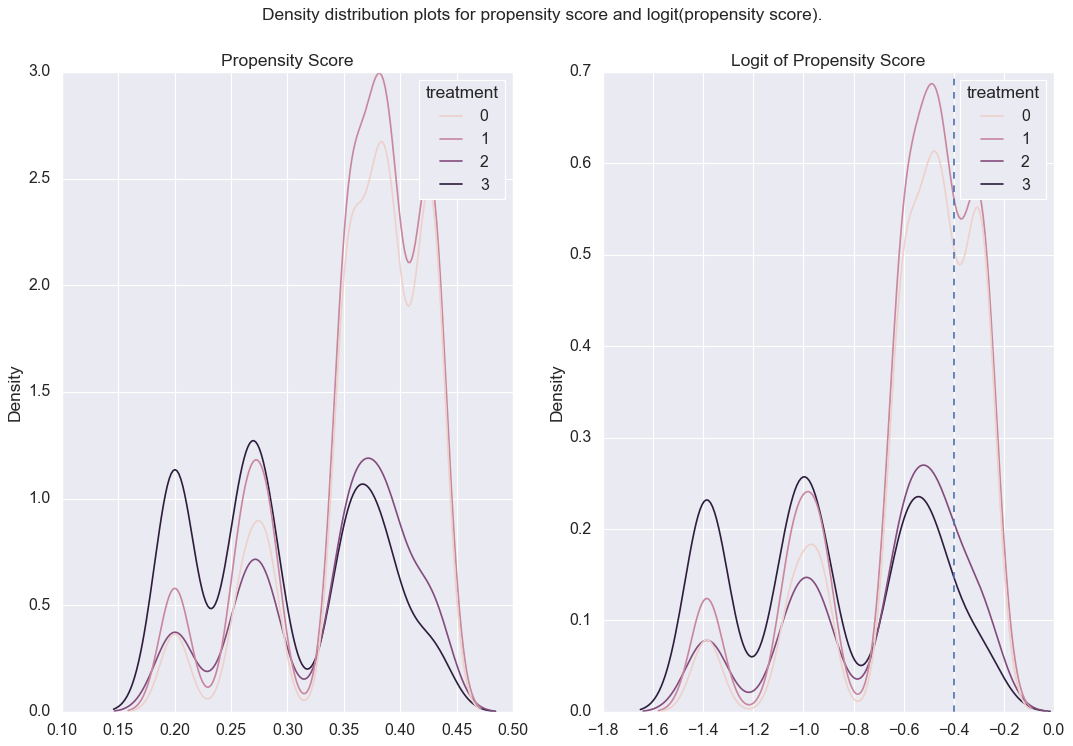


Caliper (radius) is: 0.0178

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
27

MemoryError: 

In [830]:
obtain_results(simulated_confounders_df, 'treatment', 'outcome', ['outcome'], bins=[5,15,25])

In [24]:
# Individual facility count test


arts_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['arts_count'], 10), 625)
cinema_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['cinema_count'], 10), 625)
gallery_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['gallery_count'], 10), 625)
comm_center_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['comm_center_count'], 10), 625)
dance_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['dance_count'], 10), 625)
lgbt_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['lgbt_count'], 10), 625)
library_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['library_count'], 10), 625)
museum_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['museum_count'], 10), 625)
music_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['music_count'], 10), 625)
outdoor_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['outdoor_count'], 10), 625)
pub_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['pub_count'], 10), 625)
skate_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['skate_count'], 10), 625)
theatre_count_2011 = np.repeat(get_exponential_generated(full_dataset_confounders_2011['theatre_count'], 10), 625)